<a href="https://colab.research.google.com/github/Aravind-11/IITM_Saastra/blob/main/rl_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

Initial x: 5.89 m
Initial y: 10.11 m
Initial theta: 3.06 rad

Goal x: 19.00 m
Goal y: 15.00 m
Goal theta: 0.00 rad



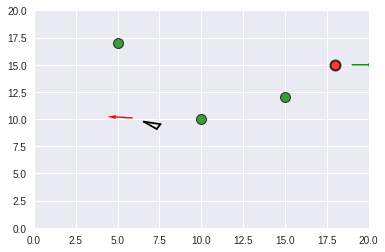

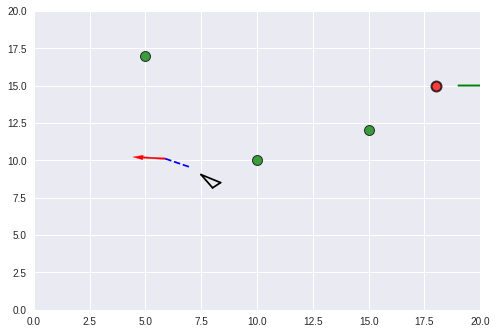

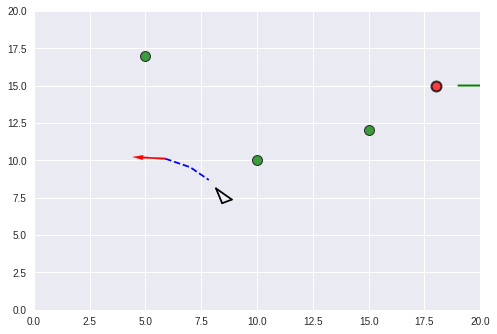

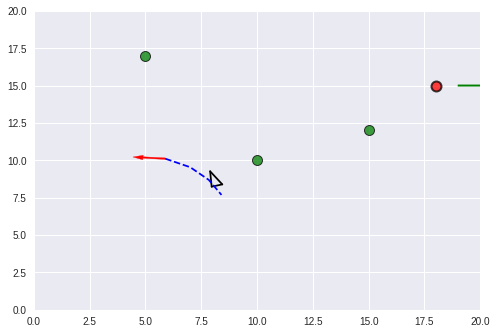

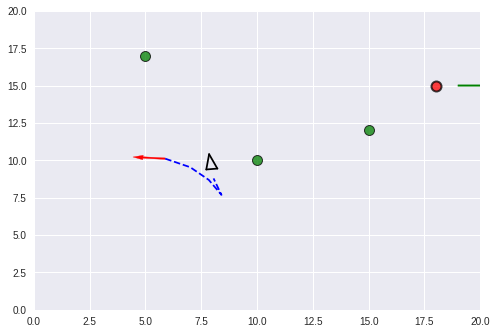

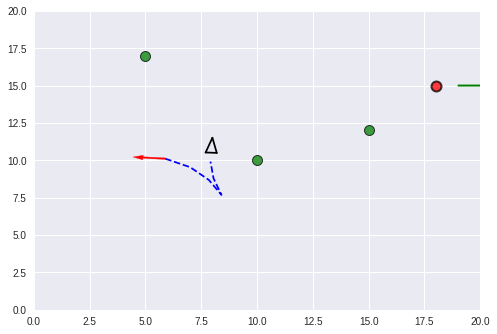

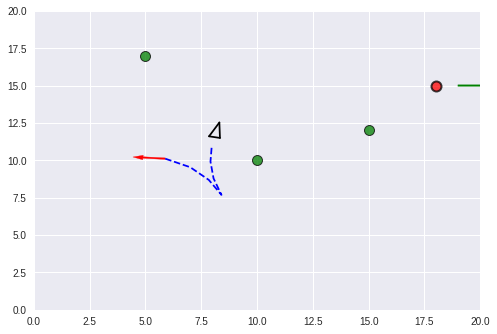

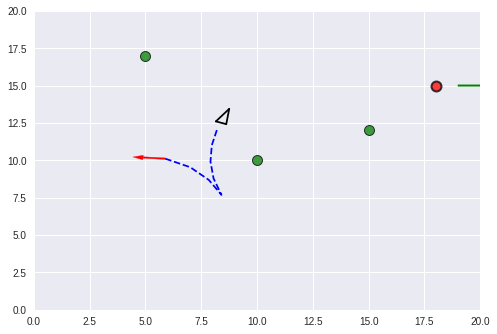

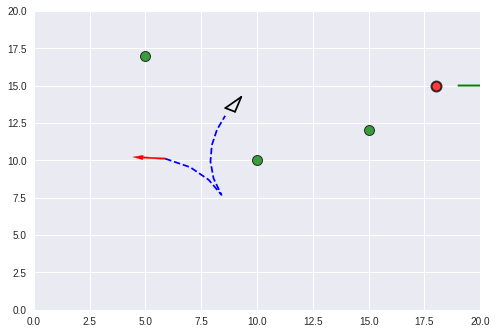

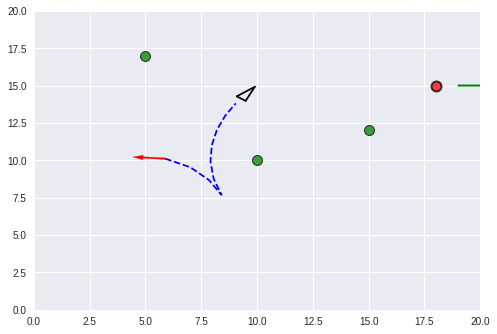

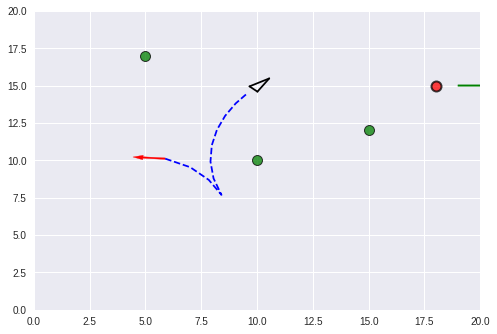

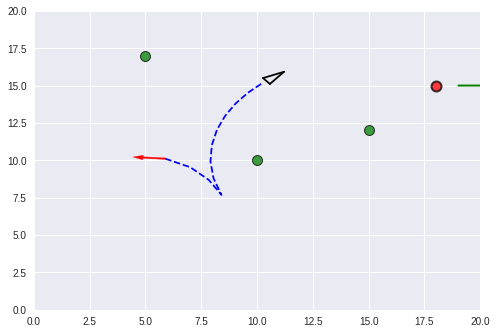

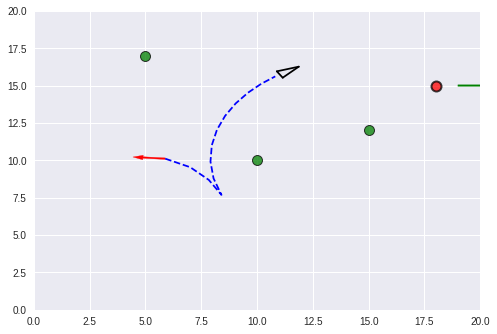

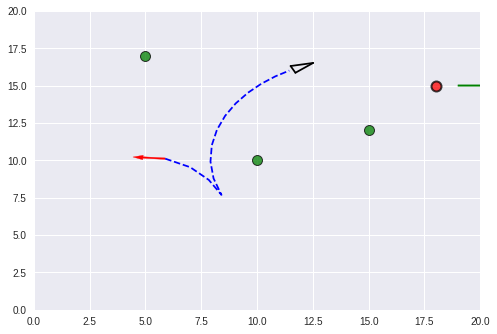

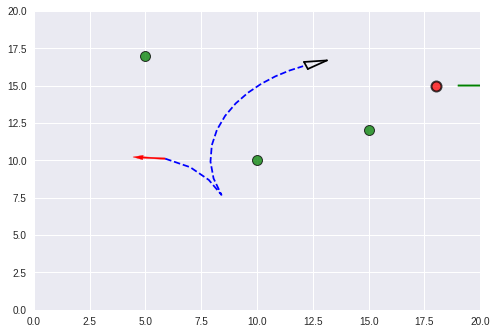

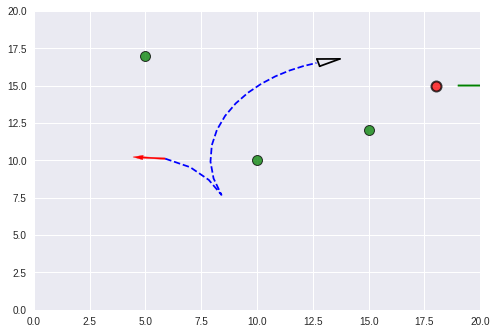

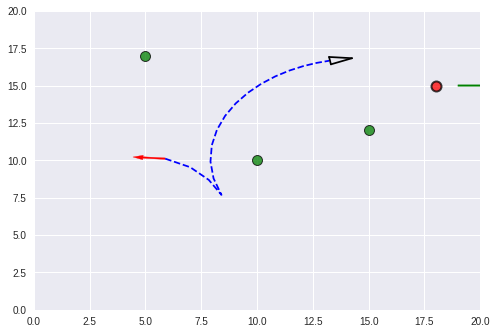

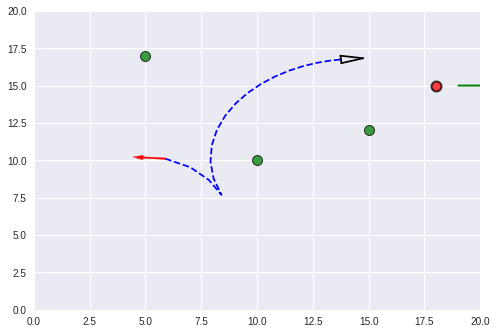

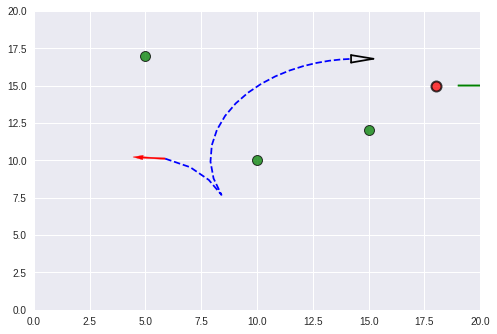

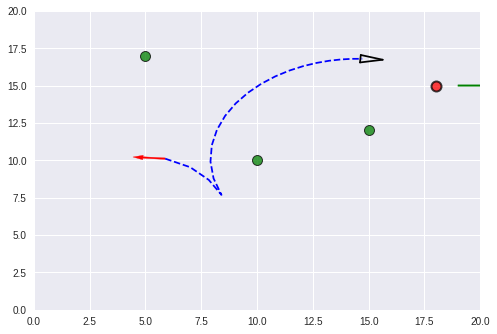

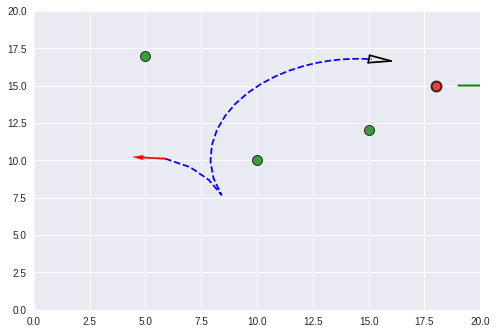

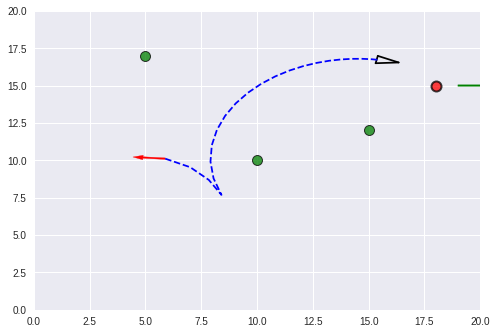

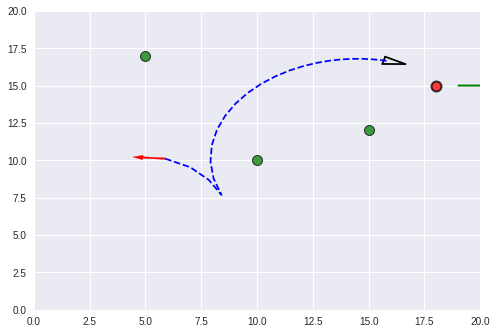

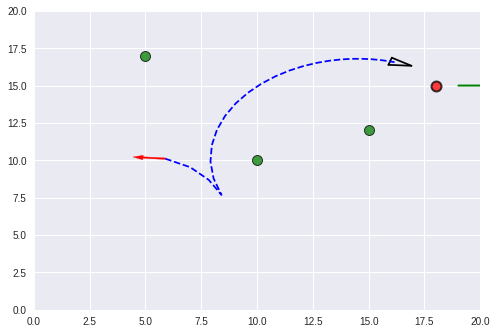

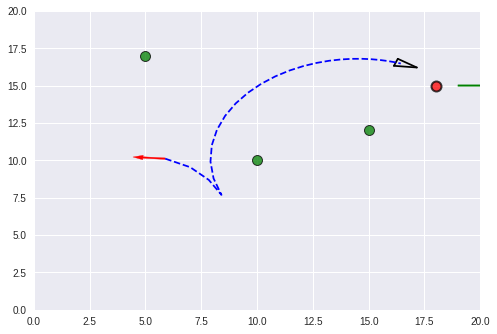

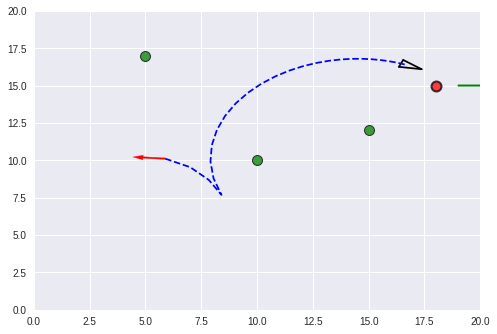

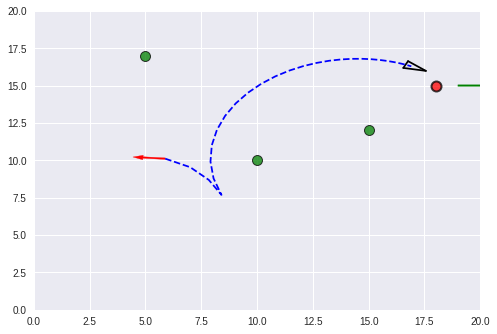

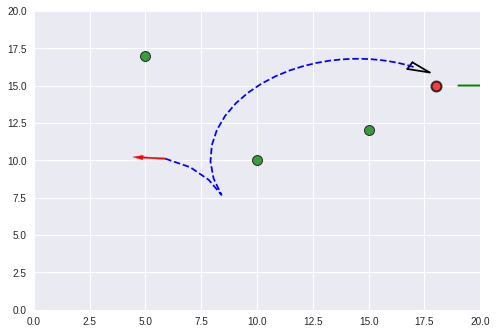

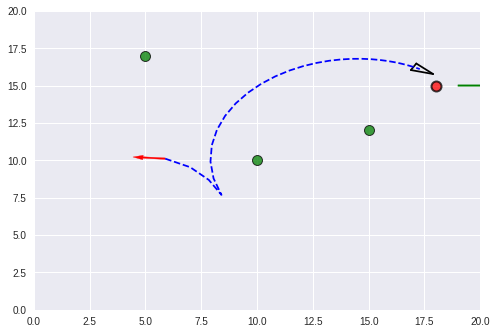

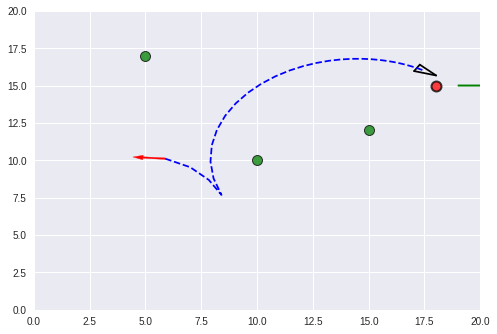

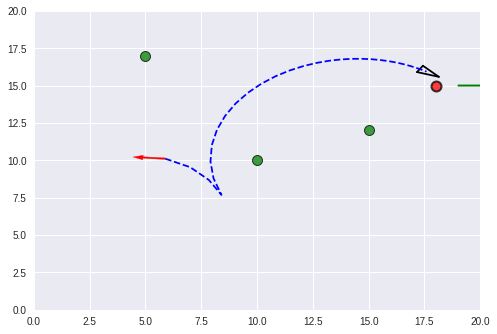

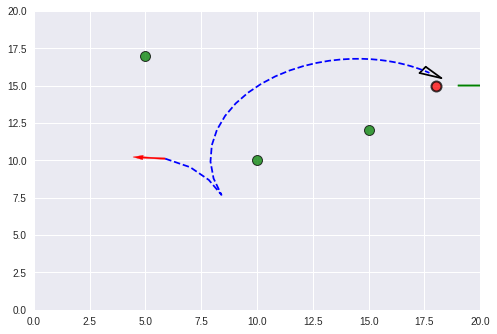

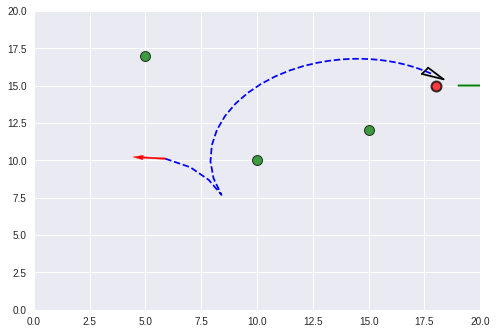

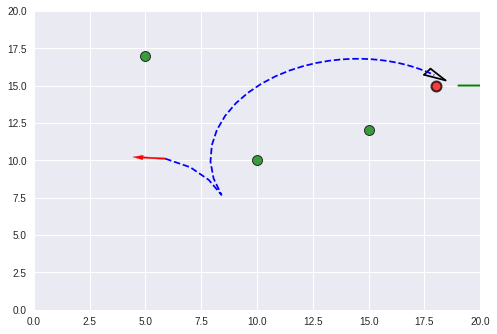

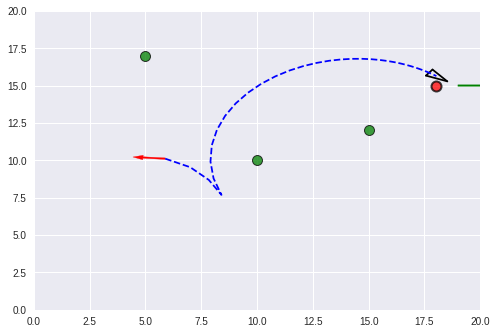

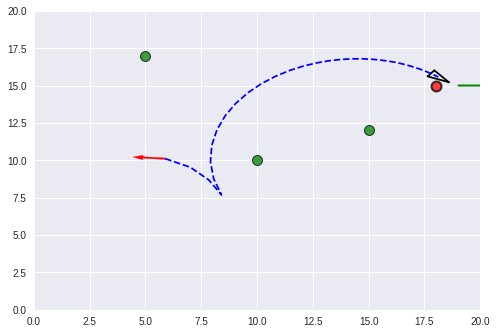

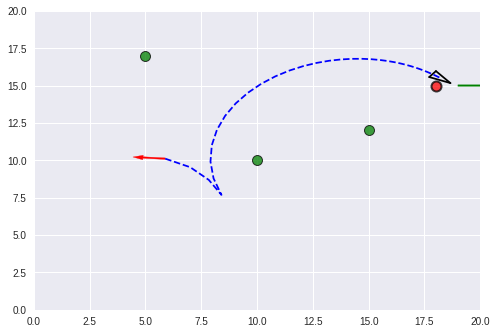

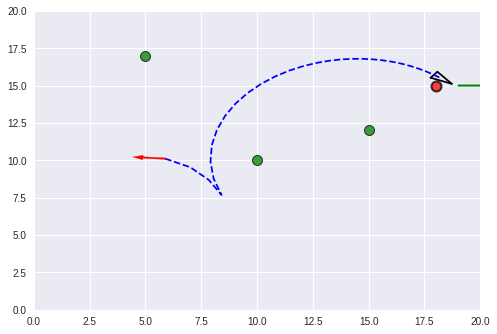

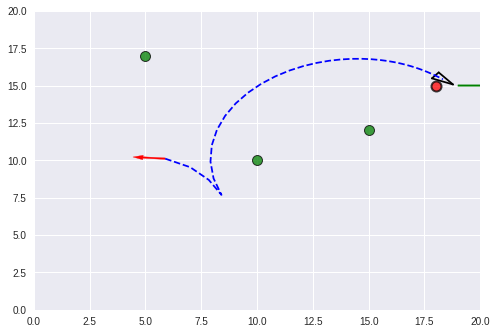

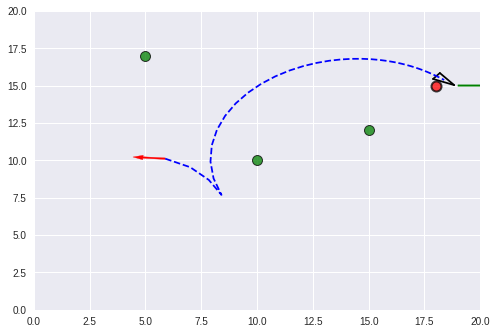

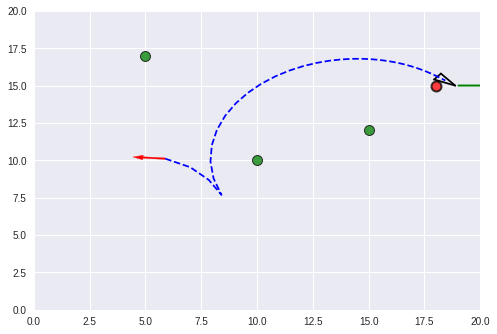

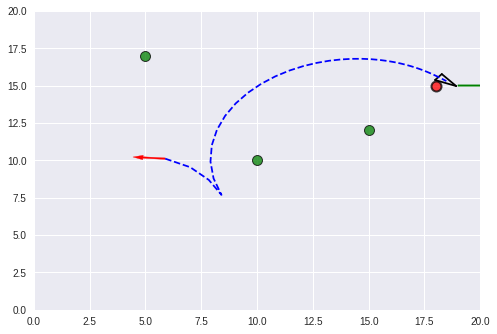

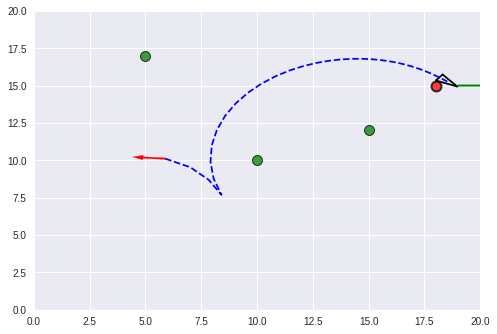

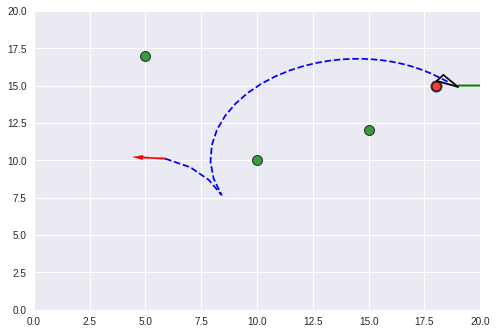

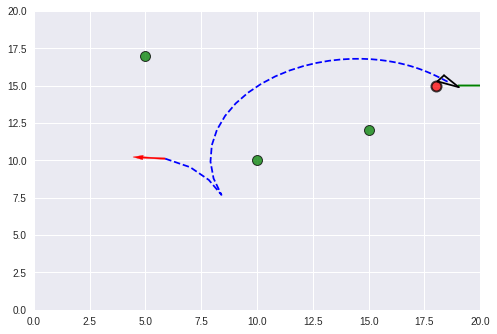

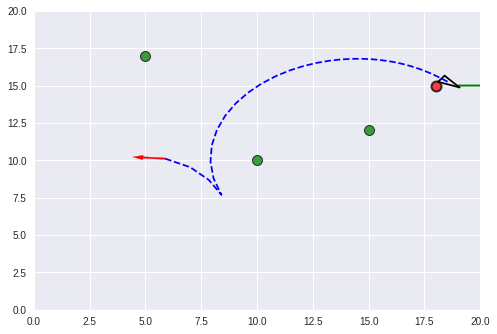

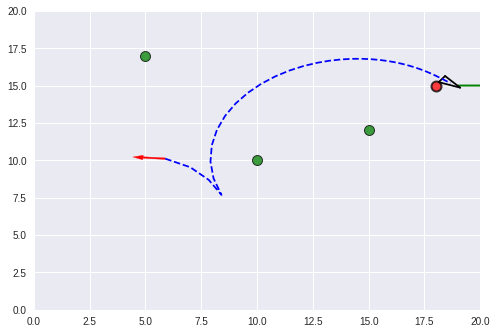

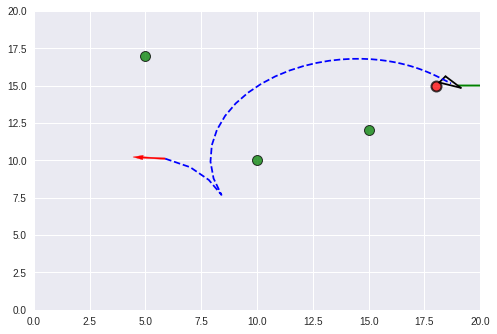

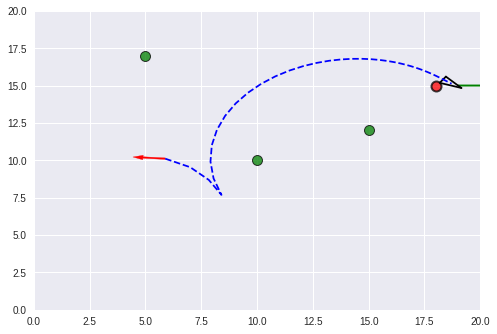

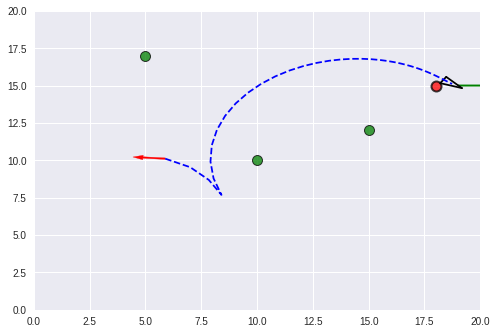

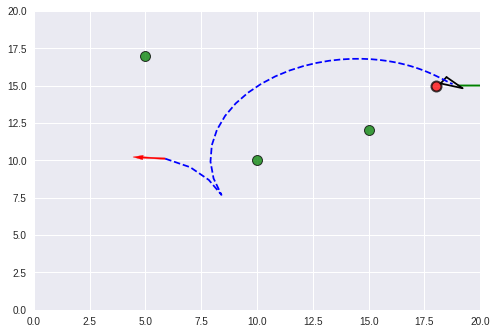

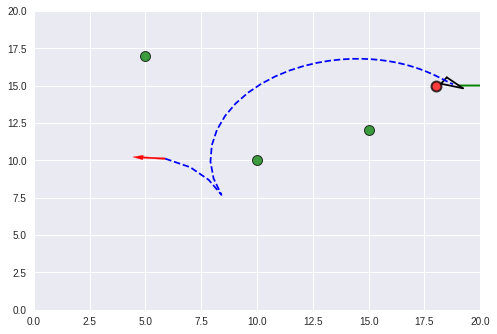

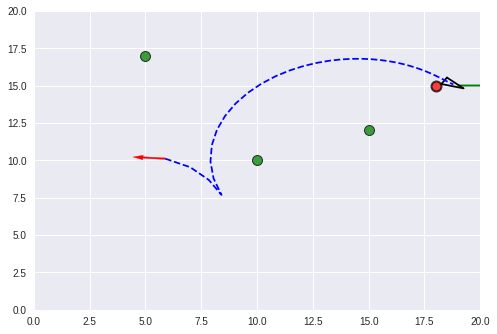

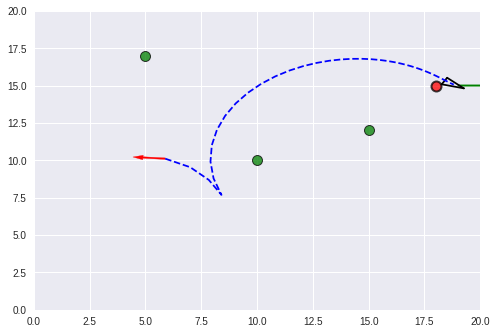

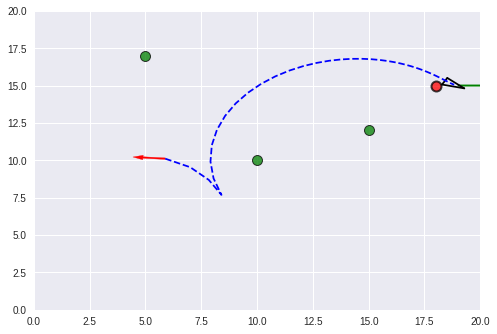

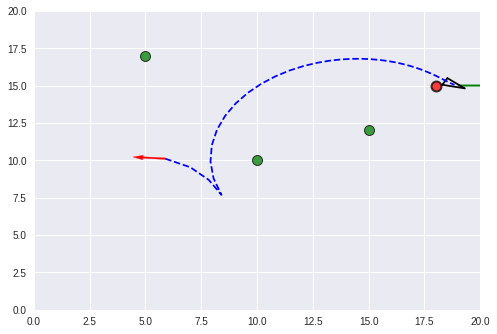

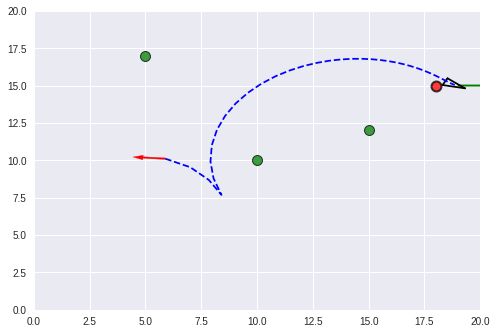

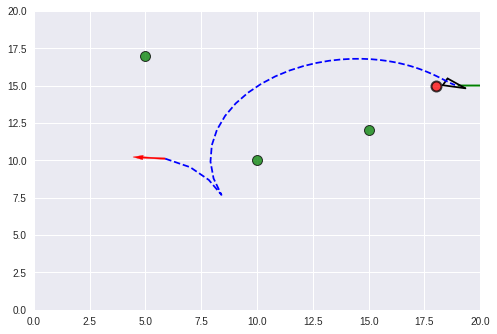

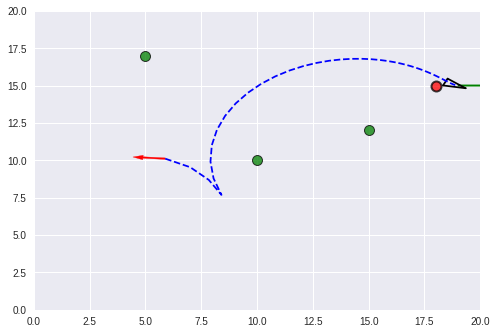

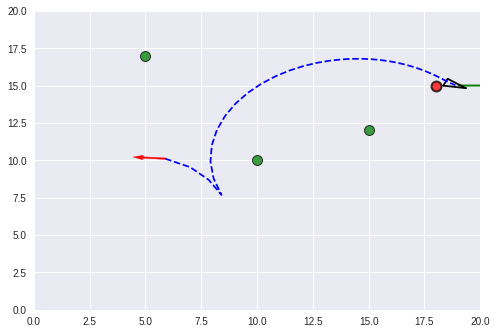

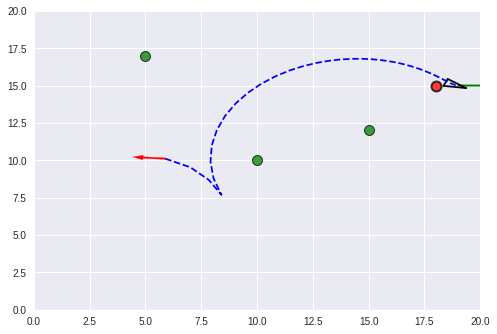

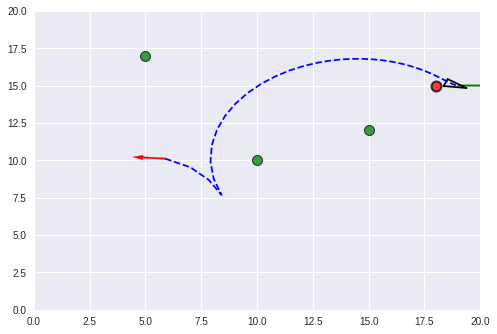

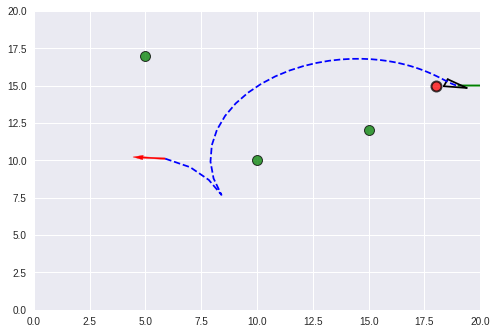

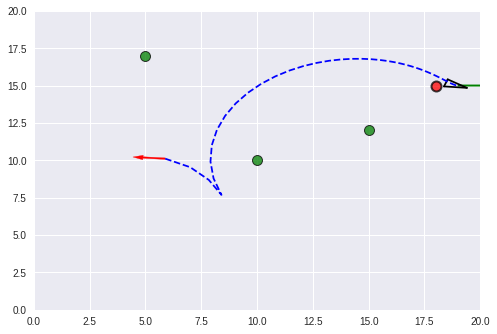

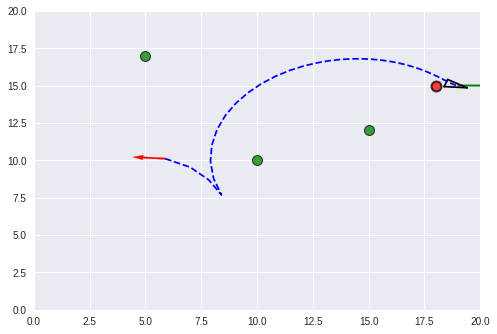

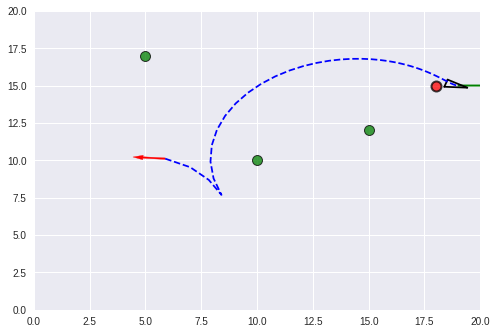

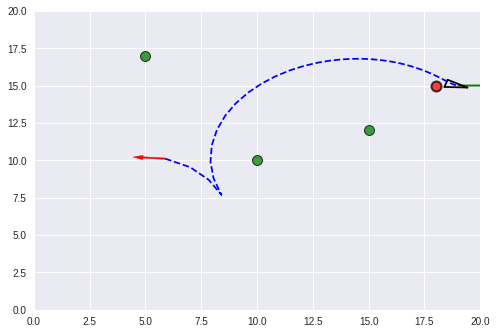

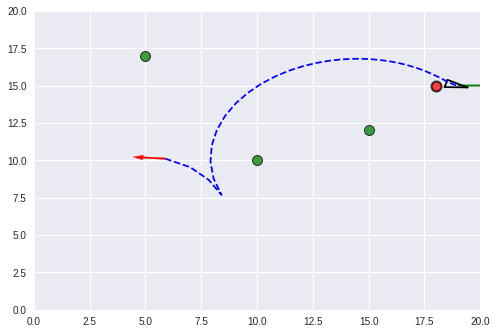

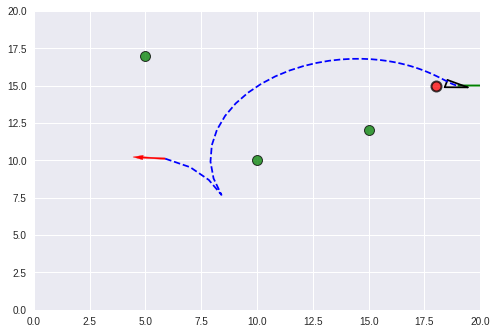

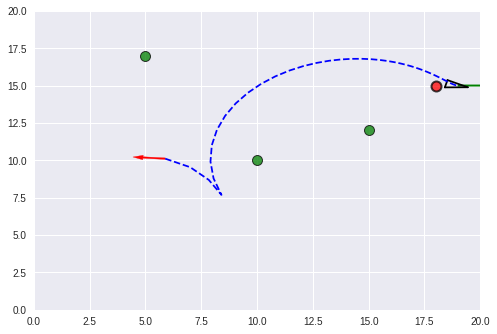

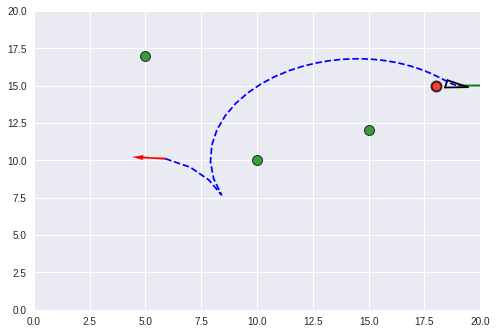

KeyboardInterrupt: ignored

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

# simulation parameters
Kp_rho = 9
Kp_alpha = 15
Kp_beta = -3
dt = 0.01

show_animation = True


def move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal):
    """
    rho is the distance between the robot and the goal position
    alpha is the angle to the goal relative to the heading of the robot
    beta is the angle between the robot's position and the goal position plus the goal angle
    Kp_rho*rho and Kp_alpha*alpha drive the robot along a line towards the goal
    Kp_beta*beta rotates the line so that it is parallel to the goal angle
    """
    x = x_start
    y = y_start
    theta = theta_start

    x_diff = x_goal - x
    y_diff = y_goal - y

    x_traj, y_traj = [], []

    rho = np.hypot(x_diff, y_diff)
    while rho > 0.001:
        x_traj.append(x)
        y_traj.append(y)

        x_diff = x_goal - x
        y_diff = y_goal - y

        # Restrict alpha and beta (angle differences) to the range
        # [-pi, pi] to prevent unstable behavior e.g. difference going
        # from 0 rad to 2*pi rad with slight turn

        rho = np.hypot(x_diff, y_diff)
        #alpha = (np.arctan2(y_diff, x_diff)
        #         - theta + np.pi) % (2 * np.pi) - np.pi
        #beta = (theta_goal - theta - alpha + np.pi) % (2 * np.pi) - np.pi

        v = Kp_rho * rho
        w = Kp_alpha * alpha + Kp_beta * beta

        if alpha > np.pi / 2 or alpha < -np.pi / 2:
            v = -v

        theta = theta + w * dt
        x = x + v * np.cos(theta) * dt
        y = y + v * np.sin(theta) * dt

        if show_animation:  # pragma: no cover
            plt.cla()
            plt.arrow(x_start, y_start, np.cos(theta_start),
                      np.sin(theta_start), color='r', width=0.1)
            plt.arrow(x_goal, y_goal, np.cos(theta_goal),
                      np.sin(theta_goal), color='g', width=0.1)
            plot_vehicle(x, y, theta, x_traj, y_traj)


def plot_vehicle(x, y, theta, x_traj, y_traj):  # pragma: no cover
    # Corners of triangular vehicle when pointing to the right (0 radians)
    p1_i = np.array([0.5, 0, 1]).T
    p2_i = np.array([-0.5, 0.25, 1]).T
    p3_i = np.array([-0.5, -0.25, 1]).T

    T = transformation_matrix(x, y, theta)
    p1 = np.matmul(T, p1_i)
    p2 = np.matmul(T, p2_i)
    p3 = np.matmul(T, p3_i)
    
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')
    plt.style.use('seaborn')
    plt.scatter([5,10,15],[17,10,12],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
    plt.style.use('seaborn')
    plt.scatter([18],[15],s=100,c='red',edgecolor='black',linewidth=2,alpha=0.75)   
    plt.plot(x_traj, y_traj, 'b--')
    #circle1 = plt.Circle((0, 0), 0.2, color='r')
    #fig, ax = plt.subplots()
    
    # for stopping simulation with the esc key.
    plt.gcf().canvas.mpl_connect('key_release_event',
            lambda event: [exit(0) if event.key == 'escape' else None])
    
    plt.xlim(0, 20)
    plt.ylim(0, 20)
    
    plt.pause(dt)


def transformation_matrix(x, y, theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), x],
        [np.sin(theta), np.cos(theta), y],
        [0, 0, 1]
    ])


def main():

    for i in range(1):
        x_start = 20 * random()
        y_start = 20 * random()
        theta_start = 2 * np.pi * random() - np.pi
        x_goal = 19
        y_goal = 15
        theta_goal = 0 
        print("Initial x: %.2f m\nInitial y: %.2f m\nInitial theta: %.2f rad\n" %
              (x_start, y_start, theta_start))
        print("Goal x: %.2f m\nGoal y: %.2f m\nGoal theta: %.2f rad\n" %
              (x_goal, y_goal, theta_goal))
        move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal)


if __name__ == '__main__':
    main()

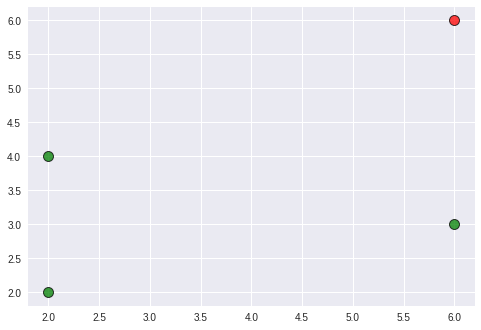

In [ ]:
plt.style.use('seaborn')
plt.scatter([2,3,6],[4,6,8],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
plt.style.use('seaborn')
plt.scatter([20],[15],s=100,c='red',edgecolor='black',linewidth=1,alpha=0.75) 
